In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Define the paths to your folders
train_dir = "C:\\Users\\hp\\Desktop\\project_folder"  # Replace with your path, e.g., "./project_folder/"

# Initialize ImageDataGenerator with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # Reserve 20% of images for validation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='binary',
    subset='training'  # Use this subset for training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use this subset for validation
)


Found 1152 images belonging to 2 classes.
Found 287 images belonging to 2 classes.


In [3]:
from tensorflow.keras import Input


model = Sequential([
    Input(shape=(128, 128, 3)),  # Define the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("done...")

done...


In [4]:
# Define EarlyStopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

print("done...")


C:\Users\hp\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6713 - loss: 0.6471

C:\Users\hp\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6747 - loss: 0.6417 - val_accuracy: 0.8885 - val_loss: 0.2661
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 954ms/step - accuracy: 0.9271 - loss: 0.1885 - val_accuracy: 0.9059 - val_loss: 0.2536
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 950ms/step - accuracy: 0.9282 - loss: 0.1844 - val_accuracy: 0.9477 - val_loss: 0.2235
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 952ms/step - accuracy: 0.9120 - loss: 0.1934 - val_accuracy: 0.9303 - val_loss: 0.1917
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 947ms/step - accuracy: 0.9414 - loss: 0.1423 - val_accuracy: 0.9408 - val_loss: 0.1973
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 947ms/step - accuracy: 0.9540 - loss: 0.1366 - val_accuracy: 0.8780 - val_loss: 0.3879
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 946ms/step - accuracy: 0.9458 - loss: 0.1488 - val_accuracy: 0.9303 - val_loss: 0.1792
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 953ms/step - accuracy: 0.9583 - loss: 0.1082 - val_accuracy: 0.9338 -

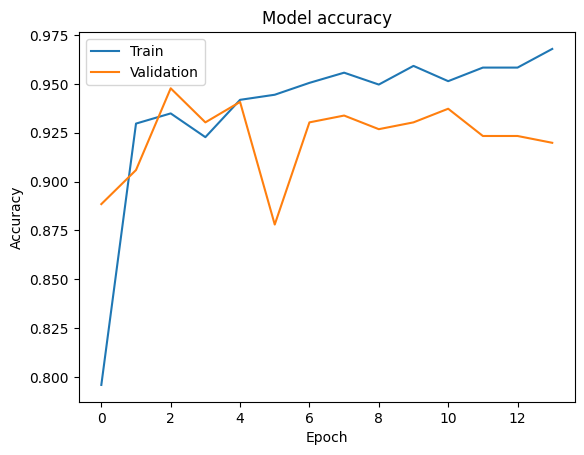

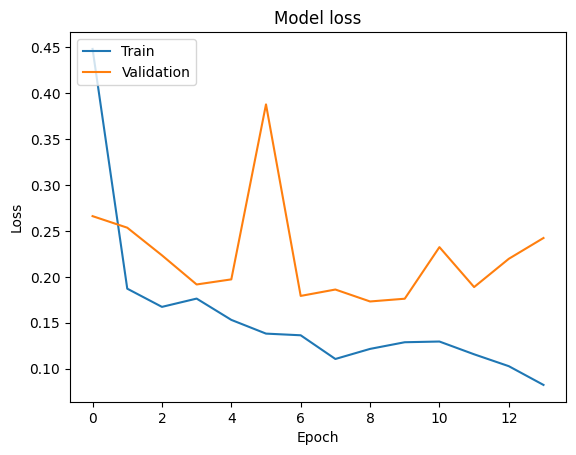

done


In [5]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
print("done")

In [6]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Test generator
test_generator = test_datagen.flow_from_directory(
    'C:\\Users\\hp\\Desktop\\test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle to maintain order for evaluation
)


Found 39 images belonging to 2 classes.


In [7]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


C:\Users\hp\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9725 - loss: 0.0854
Test Loss: 0.08365371823310852
Test Accuracy: 0.9743589758872986


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions (probabilities) on test data
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int).ravel()  # Convert probabilities to binary labels
y_true = test_generator.classes  # True labels from the generator

# Print classification report for precision, recall, and F1-score
print(classification_report(y_true, y_pred, target_names=['Uncracked', 'Cracked']))

# Display confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
              precision    recall  f1-score   support

   Uncracked       1.00      0.95      0.97        20
     Cracked       0.95      1.00      0.97        19

    accuracy                           0.97        39
   macro avg       0.97      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39

Confusion Matrix:
[[19  1]
 [ 0 19]]


In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_image(image_path, model):
    # Load the image and resize it to the size the model expects (e.g., 128x128)
    img = load_img(image_path, target_size=(128, 128))  # Adjust size if different
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class of the image
    return model.predict(img_array)


In [22]:
# Path to the image you want to classify
image_path = "teeeeeeeeeeeest.jpg"  # Replace with your actual image path

# Run the prediction
result = predict_image(image_path, model)
print(f"{image_path}: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
teeeeeeeeeeeest.jpg: [[0.0399195]]


In [ ]:
#Pretrained Model: ResNet

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [10]:
# Define data paths
train_dir = "C:\\Users\\hp\\Desktop\\project_folder"
validation_dir = "C:\\Users\\hp\\Desktop\\test"

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Only rescaling for validation
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # ResNet50 expects 224x224 input
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 1439 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [11]:
# Load ResNet50 with pretrained weights, without the top layer
import h5py
with h5py.File('test.h5', 'w') as f:
    f.create_dataset('test_dataset', data=[1, 2, 3])

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pretrained weights
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stop]
)


C:\Users\hp\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.5353 - loss: 0.9500 - val_accuracy: 0.7949 - val_loss: 0.5217
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.7593 - loss: 0.5162 - val_accuracy: 0.8462 - val_loss: 0.4644
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.8130 - loss: 0.4462 - val_accuracy: 0.8205 - val_loss: 0.4379
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8248 - loss: 0.4238 - val_accuracy: 0.8462 - val_loss: 0.4064
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8415 - loss: 0.3874 - val_accuracy: 0.8205 - val_loss: 0.4163
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.8682 - loss: 0.3498 - val_accuracy: 0.8462 - val_loss: 0.3929
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.8628 - loss: 0.3489 - val_accuracy: 0.8462 - val_loss: 0.3650
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8575 - loss: 0.3283 - val_accuracy: 0.8462 - v

In [13]:
# Assuming you have a test generator set up similarly to the validation generator
test_dir = "C:\\Users\\hp\\Desktop\\test"
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 39 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - accuracy: 0.9004 - loss: 0.2775
Test Loss: 0.2782953083515167
Test Accuracy: 0.8974359035491943


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Predict on the test set
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)
y_true = test_generator.classes  # True labels from the test generator


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


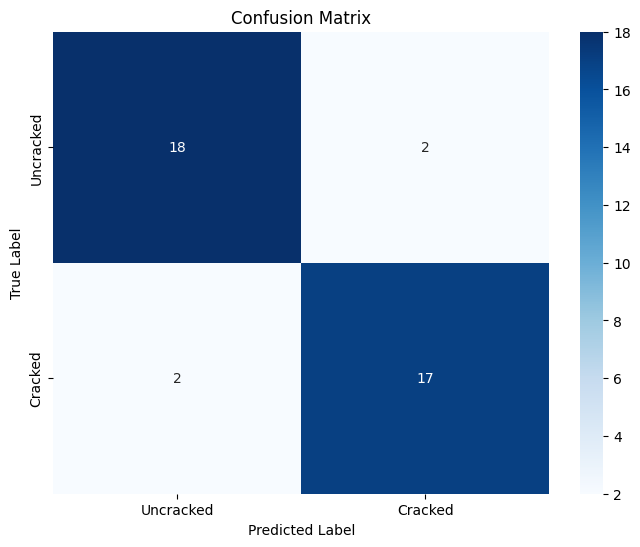

In [19]:
# Plot the confusion matrix using seaborn for better visualization
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Uncracked', 'Cracked'], yticklabels=['Uncracked', 'Cracked'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [20]:
# Print additional metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Uncracked', 'Cracked']))


Classification Report:
              precision    recall  f1-score   support

   Uncracked       0.90      0.90      0.90        20
     Cracked       0.89      0.89      0.89        19

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39

